## Facebook page Sentiment Analysis Project
### Problem No 1:
##### First how we find the the pos and neg likes?
##### For this problem we use nlargest and nsmallest function to solve neg and pos posts.
### Problem No 2:
##### Second problem is how we improve our audience on facebook page and reach more people?
##### To solve this problems we use classification algorihms like:
##### (1) Decision Tree Classifier
##### (2) Logistic Regression
##### (3) Multinomial Naive Bayes

## Import libraries

In [1]:
import math
import numpy as np 
import re
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
import pandas as pd
import pandera as pa
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
%matplotlib inline
from sklearn.svm import LinearSVC
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
Df=pd.read_csv('Facebook posts and sentiments.csv')

## See first 5 rows of dataset

In [3]:
Df.head()

,Brand,post_id,post_text,time,likes,comments,shares,post_url,sentiment_score,sentiment_magnitude
0,DMK,5.311750e+15,Start on the right foot for your first impress...,2021-04-03 11:36:51,177,0,0,https://facebook.com/DMKShoes/posts/5311745528...,0.2,0.7
1,DMK,5.307740e+15,Getting that crop top + wide trousers combo ri...,2021-04-02 15:58:02,216,0,0,https://facebook.com/DMKShoes/posts/5307740495...,0.3,0.9
2,DMK,5.302814e+15,Sweet dreams are made of these - Bubble Dream ...,2021-04-01 16:17:29,385,0,0,https://facebook.com/DMKShoes/posts/5302814246...,0.4,1.2
3,DMK,5.292993e+15,"@annavanticalopez: ""Disney’s CEO, Bob Iger, is...",2021-03-30 15:41:29,214,0,0,https://facebook.com/DMKShoes/posts/5292992840...,0.0,4.5
4,DMK,5.280722e+15,"@annavanticalopez: ""When I first started model...",2021-03-28 11:36:40,118,0,0,https://facebook.com/DMKShoes/posts/5280721625...,0.0,3.4


## See the last 10 rows of dataset

In [4]:
Df.tail(10)

,Brand,post_id,post_text,time,likes,comments,shares,post_url,sentiment_score,sentiment_magnitude
4000,Charles & Keith,1.015687e+16,NaN,2019-04-26 15:42:00,276,6,0,https://facebook.com/charleskeithofficial/post...,0.0,0.0
4001,Charles & Keith,1.015686e+16,Dressing for the heat? This see-through woven ...,2019-04-25 21:00:02,93,2,0,https://facebook.com/charleskeithofficial/vide...,0.3,1.3
4002,Charles & Keith,1.015686e+16,The printed bow adds a dash of personality to ...,2019-04-25 18:00:01,125,7,0,https://facebook.com/charleskeithofficial/vide...,0.5,1.1
4003,Charles & Keith,1.015686e+16,Animal prints are in vogue again – in this col...,2019-04-25 15:00:00,369,3,0,https://facebook.com/charleskeithofficial/post...,0.5,1.1
4004,Charles & Keith,1.015686e+16,"This season, work some raffia into your outfit...",2019-04-23 15:00:00,216,0,0,https://facebook.com/charleskeithofficial/post...,0.6,1.2
4005,Charles & Keith,1.015685e+16,"From a flush of blush to a pop of pink, embrac...",2019-04-22 15:00:00,936,40,0,https://facebook.com/charleskeithofficial/post...,0.7,1.4
4006,Charles & Keith,1.015686e+16,NaN,2019-04-20 21:00:10,219,5,0,https://facebook.com/charleskeithofficial/post...,0.0,0.0
4007,Charles & Keith,1.015686e+16,NaN,2019-04-20 15:08:32,370,4,0,https://facebook.com/charleskeithofficial/post...,0.0,0.0
4008,Charles & Keith,1.015685e+16,NaN,2019-04-19 21:05:04,151,2,0,https://facebook.com/charleskeithofficial/post...,0.0,0.0
4009,Charles & Keith,1.015685e+16,NaN,2019-04-19 18:05:02,127,0,0,https://facebook.com/charleskeithofficial/post...,0.0,0.0


## See the no of rows and columns of dataset

In [5]:
Df.shape

(4010, 10)

## See the count of shares

In [6]:
Df['shares'].value_counts()

0     3948
2       26
3       19
4        7
5        4
6        2
8        1
10       1
11       1
23       1
Name: shares, dtype: int64

## See tha statistics of Df using describe function

In [7]:
Df.describe(include="all")

,Brand,post_id,post_text,time,likes,comments,shares,post_url,sentiment_score,sentiment_magnitude
count,4010,4.009000e+03,2594,4010,4010.000000,4010.000000,4010.000000,4009,2479.000000,2479.000000
unique,4,NaN,2338,3994,NaN,NaN,NaN,4008,NaN,NaN
top,Charles & Keith,NaN,Preppy style is having a major moment this sea...,2021-03-23 12:00:01,NaN,NaN,NaN,https://facebook.com/DMKShoes/posts/6915754609...,NaN,NaN
freq,1500,NaN,9,7,NaN,NaN,NaN,2,NaN,NaN
mean,NaN,5.250477e+15,NaN,NaN,344.990773,2.874314,0.055112,NaN,0.217547,0.650948
std,NaN,3.858130e+15,NaN,NaN,794.390282,9.567482,0.582616,NaN,0.244278,0.752916
min,NaN,1.562596e+14,NaN,NaN,0.000000,0.000000,0.000000,NaN,-0.400000,0.000000
25%,NaN,2.023038e+15,NaN,NaN,7.000000,0.000000,0.000000,NaN,0.000000,0.000000
50%,NaN,2.925365e+15,NaN,NaN,146.000000,0.000000,0.000000,NaN,0.100000,0.500000
75%,NaN,1.015744e+16,NaN,NaN,385.000000,2.000000,0.000000,NaN,0.400000,1.100000


In [8]:
Df.isna().sum()

Brand                     0
post_id                   1
post_text              1416
time                      0
likes                     0
comments                  0
shares                    0
post_url                  1
sentiment_score        1531
sentiment_magnitude    1531
dtype: int64

In [9]:
Df.columns

Index(['Brand', 'post_id', 'post_text', 'time', 'likes', 'comments', 'shares',
       'post_url', 'sentiment_score', 'sentiment_magnitude'],
      dtype='object')

In [10]:
Df.drop(['Brand', 'post_id', 'time', 'post_url', 'sentiment_score', 'sentiment_magnitude', "shares", "comments"], axis=1, inplace=True)
df=Df
df

,post_text,likes
0,Start on the right foot for your first impress...,177
1,Getting that crop top + wide trousers combo ri...,216
2,Sweet dreams are made of these - Bubble Dream ...,385
3,"@annavanticalopez: ""Disney’s CEO, Bob Iger, is...",214
4,"@annavanticalopez: ""When I first started model...",118
...,...,...
4005,"From a flush of blush to a pop of pink, embrac...",936
4006,NaN,219
4007,NaN,370
4008,NaN,151


In [11]:
Df=df
df

,post_text,likes
0,Start on the right foot for your first impress...,177
1,Getting that crop top + wide trousers combo ri...,216
2,Sweet dreams are made of these - Bubble Dream ...,385
3,"@annavanticalopez: ""Disney’s CEO, Bob Iger, is...",214
4,"@annavanticalopez: ""When I first started model...",118
...,...,...
4005,"From a flush of blush to a pop of pink, embrac...",936
4006,NaN,219
4007,NaN,370
4008,NaN,151


In [12]:
df.isna().sum()

post_text    1416
likes           0
dtype: int64

In [13]:
df['post_text']=df['post_text'].fillna('None')

In [14]:
df

,post_text,likes
0,Start on the right foot for your first impress...,177
1,Getting that crop top + wide trousers combo ri...,216
2,Sweet dreams are made of these - Bubble Dream ...,385
3,"@annavanticalopez: ""Disney’s CEO, Bob Iger, is...",214
4,"@annavanticalopez: ""When I first started model...",118
...,...,...
4005,"From a flush of blush to a pop of pink, embrac...",936
4006,None,219
4007,None,370
4008,None,151


## Find the gretest likes on our posts 

In [15]:
df1=df.nlargest(20, ['likes'])
print(df1)

                                              post_text  likes
3882                                               None  22171
3633  Be right back, adding this to our TGIF wish li...  14585
3674                                               None  10087
3889                                               None   9140
3791                                               None   8793
3585  We're bringing basics back...\n \n Get the bag...   8511
3756                                               None   7978
3741  Get acquainted with the print of the season: s...   7900
3648                                               None   7759
3703                                               None   7394
3872                                               None   6917
3815  Featuring our latest muses Hailey Baldwin and ...   6719
941                                                None   6435
3754                                               None   6113
945                                                None

## Show posts on barplot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'None'),
  Text(1, 0, 'Be right back, adding this to our TGIF wish list.\n \n Get the wedges: http://bit.ly/338aAdd'),
  Text(2, 0, "We're bringing basics back...\n \n Get the bags: http://bit.ly/2pchWy4"),
  Text(3, 0, 'Get acquainted with the print of the season: snake.\n \n Get the bag: http://bit.ly/2ZlHxVd'),
  Text(4, 0, 'Featuring our latest muses Hailey Baldwin and Xiao Wen Ju, the CHARLES & KEITH Fall/Winter 2019 campaign is a celebration of modern women and their individuality.\n \n #CHARLESKEITHFW19'),
  Text(5, 0, "The search is over: we've found your new go-to pumps. Simple, yet stylish they pretty much go with everything.\n \n Get these flats: http://bit.ly/2JwJLIN"),
  Text(6, 0, 'ក្នុងឳកាសទិវាសិទ្ធិនារីអន្តរជាតិនេះ លោកអ្នកនឹងទទួលបានទៀនក្រអូបមួយឈុតរាល់ការចំណាយចាប់ពី ៩៩ ដុល្លារ នៅសាខាមហាវិថីព្រះសីហនុ ផ្សារទំនើបអ៊ីអនម៉លភ្នំពេញនិង សែនសុខ។ លក្ខខ័ណ្ឌផ្សេងៗត្រូវបានអនុវត្ត។\n \n This International Women’s Day receive a complimen

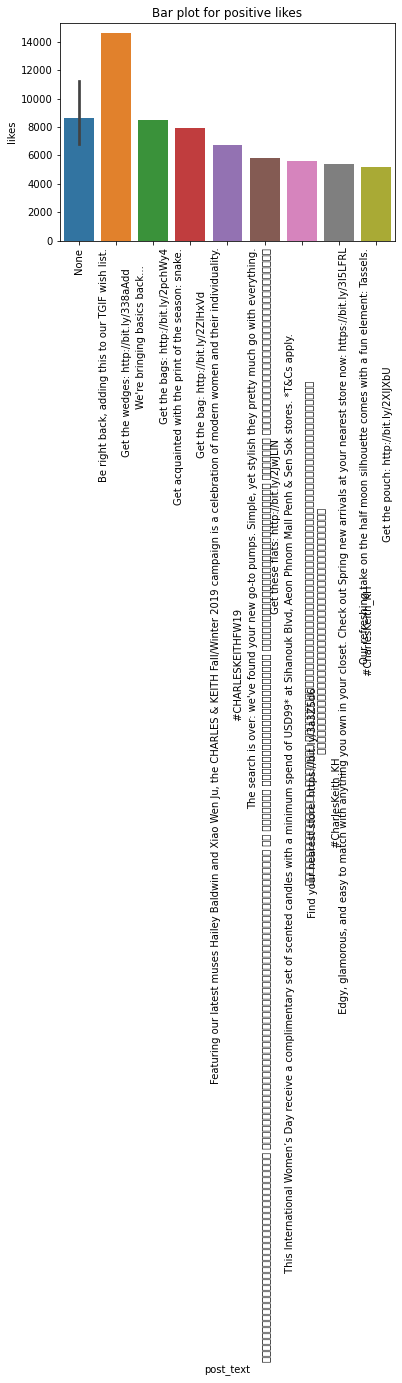

In [16]:
sns.barplot(x=df1['post_text'], y=df1['likes'])
plt.title("Bar plot for positive likes")
plt.xticks(rotation=90)

## Find the smallest likes on our posts 

In [17]:
df2=df.nsmallest(20, ['likes'])
print(df2)

                                              post_text  likes
848   GET YOUR SLIDE ON: Slip right into effortless ...      0
984                                                None      0
993                                                None      0
994                                                None      0
995                                                None      0
1006                                               None      0
1007                                               None      0
1008                                               None      0
1010                                               None      0
1012                                               None      0
1013                                               None      0
1018                                               None      0
1019                                               None      0
1020                                               None      0
1023                                               None

## Show smallest likes on barplot

Text(0.5, 1.0, 'Negative likes on page')

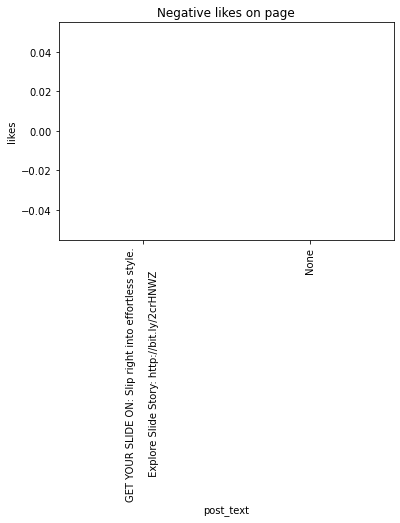

In [18]:
sns.barplot(x=df2['post_text'], y=df2['likes'])
plt.xticks(rotation=90)
plt.title("Negative likes on page")

In [19]:
df

,post_text,likes
0,Start on the right foot for your first impress...,177
1,Getting that crop top + wide trousers combo ri...,216
2,Sweet dreams are made of these - Bubble Dream ...,385
3,"@annavanticalopez: ""Disney’s CEO, Bob Iger, is...",214
4,"@annavanticalopez: ""When I first started model...",118
...,...,...
4005,"From a flush of blush to a pop of pink, embrac...",936
4006,None,219
4007,None,370
4008,None,151


## Drop likes column

In [20]:
df.drop(['likes'], axis=1, inplace=True)

## Use sentiment analysis for finding the neg and pos labels for post_text column

## And use vader sentiment analysis

In [45]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASAD\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASAD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Find the lower of the text

In [46]:
df['post_text'] = df['post_text'].apply(lambda txt: txt.lower())

## Remove the stopwords

In [47]:
stop_words=stopwords.words('english')
df['post_text'] = df['post_text'].apply(lambda txt: ' '.join([word for word in txt.split() if word not in stop_words]))

## Tokanize the words

In [48]:
df['post_text'] = df['post_text'].apply(lambda txt: sent_tokenize(txt))

## All the tokanize words append in post_text column

In [49]:
df['post_text'] = df['post_text'].apply(lambda txt: ' '.join(txt))

## Import vader sentiment analysis library and call SentimentIntensityAnalyzer as sid

In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

## Our text column append in text variable

In [51]:
text = df['post_text']
text

0       start right foot first impression - square edg...
1       getting crop top + wide trousers combo right s...
2       sweet dreams made - bubble dream heel sandals ...
3       @annavanticalopez: "disney’s ceo, bob iger, bi...
4       @annavanticalopez: "when first started modelli...
                              ...                        
4005    flush blush pop pink, embrace season's colour ...
4006                                                 none
4007                                                 none
4008                                                 none
4009                                                 none
Name: post_text, Length: 4010, dtype: object

## Using sid we create neg pos labels

In [52]:
df['labels'] = df['post_text'].apply(lambda txt: sid.polarity_scores(txt))
df

,post_text,new_labels,labels
0,start right foot first impression - square edg...,1,"{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'comp..."
1,getting crop top + wide trousers combo right s...,1,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp..."
2,sweet dreams made - bubble dream heel sandals ...,1,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp..."
3,"@annavanticalopez: ""disney’s ceo, bob iger, bi...",1,"{'neg': 0.083, 'neu': 0.739, 'pos': 0.178, 'co..."
4,"@annavanticalopez: ""when first started modelli...",1,"{'neg': 0.073, 'neu': 0.632, 'pos': 0.295, 'co..."
...,...,...,...
4005,"flush blush pop pink, embrace season's colour ...",1,"{'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'comp..."
4006,none,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4007,none,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4008,none,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


## Create extra columns for neg, pos, neu, com

In [53]:
df['Negative'] = df['labels'].apply(lambda txt: txt['neg'])
df['Neutral'] = df['labels'].apply(lambda txt: txt['neu'])
df['Positive'] = df['labels'].apply(lambda txt: txt['pos'])
df['Compound'] = df['labels'].apply(lambda txt: txt['compound'])
df

,post_text,new_labels,labels,Negative,Neutral,Positive,Compound
0,start right foot first impression - square edg...,1,"{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'comp...",0.000,0.881,0.119,0.2263
1,getting crop top + wide trousers combo right s...,1,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.000,0.899,0.101,0.2023
2,sweet dreams made - bubble dream heel sandals ...,1,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.000,0.588,0.412,0.7717
3,"@annavanticalopez: ""disney’s ceo, bob iger, bi...",1,"{'neg': 0.083, 'neu': 0.739, 'pos': 0.178, 'co...",0.083,0.739,0.178,0.8655
4,"@annavanticalopez: ""when first started modelli...",1,"{'neg': 0.073, 'neu': 0.632, 'pos': 0.295, 'co...",0.073,0.632,0.295,0.9788
...,...,...,...,...,...,...,...
4005,"flush blush pop pink, embrace season's colour ...",1,"{'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'comp...",0.000,0.813,0.187,0.3182
4006,none,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
4007,none,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
4008,none,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000


## Based on compound column we decide pos and neg labels

In [54]:
def polarity_score(Compound):
    if Compound > 0:
        return "positive"
    elif Compound <= 0:
        return "negative"

In [55]:
df['new_labels'] = df['Compound'].apply(lambda val: polarity_score(val))
df.head(30)

,post_text,new_labels,labels,Negative,Neutral,Positive,Compound
0,start right foot first impression - square edg...,positive,"{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'comp...",0.000,0.881,0.119,0.2263
1,getting crop top + wide trousers combo right s...,positive,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.000,0.899,0.101,0.2023
2,sweet dreams made - bubble dream heel sandals ...,positive,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.000,0.588,0.412,0.7717
3,"@annavanticalopez: ""disney’s ceo, bob iger, bi...",positive,"{'neg': 0.083, 'neu': 0.739, 'pos': 0.178, 'co...",0.083,0.739,0.178,0.8655
4,"@annavanticalopez: ""when first started modelli...",positive,"{'neg': 0.073, 'neu': 0.632, 'pos': 0.295, 'co...",0.073,0.632,0.295,0.9788
5,"@annavanticalopez - ""when people say models co...",positive,"{'neg': 0.053, 'neu': 0.663, 'pos': 0.283, 'co...",0.053,0.663,0.283,0.9590
6,"@wordweed: ""over years, learnt instead learnin...",positive,"{'neg': 0.113, 'neu': 0.64, 'pos': 0.247, 'com...",0.113,0.640,0.247,0.9578
7,"@wordweed: ""body image something struggled gro...",positive,"{'neg': 0.149, 'neu': 0.654, 'pos': 0.197, 'co...",0.149,0.654,0.197,0.6743
8,"@wordweed - ""to certain extent, still imposter...",positive,"{'neg': 0.121, 'neu': 0.597, 'pos': 0.282, 'co...",0.121,0.597,0.282,0.9442
9,"march, celebrate international women’s month m...",positive,"{'neg': 0.036, 'neu': 0.538, 'pos': 0.425, 'co...",0.036,0.538,0.425,0.9897


## Check polarity score of 3000 column in post_text

In [56]:
sid.polarity_scores(df.loc[3000]['post_text'])

{'neg': 0.136, 'neu': 0.682, 'pos': 0.182, 'compound': 0.2023}

## Check polarity score of 2 column

In [57]:
sid.polarity_scores(df.loc[2]['post_text'])

{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.7717}

## Find the polarity score of 3633 row in df

In [99]:
sid.polarity_scores(df.loc[3633]['post_text'])

{'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'compound': 0.7184}

## Find the polarity score of 984 row in df

In [100]:
sid.polarity_scores(df.loc[984]['post_text'])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

## Find the polarity score of 1033 row in df

In [101]:
sid.polarity_scores(df.loc[1033]['post_text'])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

## Check polarity score of 10 column

In [58]:
sid.polarity_scores(df.loc[10]['post_text'])

{'neg': 0.116, 'neu': 0.4, 'pos': 0.484, 'compound': 0.8481}

## Check polarity score of 23 column

In [59]:
sid.polarity_scores(df.loc[23]['post_text'])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

## Count values in df dataframe

In [60]:
df['new_labels'].value_counts()

negative    2344
positive    1666
Name: new_labels, dtype: int64

## Check for null values

In [61]:
df.isna().sum()

post_text     0
new_labels    0
labels        0
Negative      0
Neutral       0
Positive      0
Compound      0
dtype: int64

## Drop those columns who have unnecessary

In [62]:
df.drop(['labels', 'Negative', 'Neutral', 'Positive', 'Compound'], axis=1, inplace=True)
df

,post_text,new_labels
0,start right foot first impression - square edg...,positive
1,getting crop top + wide trousers combo right s...,positive
2,sweet dreams made - bubble dream heel sandals ...,positive
3,"@annavanticalopez: ""disney’s ceo, bob iger, bi...",positive
4,"@annavanticalopez: ""when first started modelli...",positive
...,...,...
4005,"flush blush pop pink, embrace season's colour ...",positive
4006,none,negative
4007,none,negative
4008,none,negative


## Check no of rows and columns in dataframe

In [63]:
df.shape

(4010, 2)

## Check for null values

In [64]:
df.isna().sum()

post_text     0
new_labels    0
dtype: int64

## Replace labels pos and neg as 1, 0

In [65]:
df['new_labels'].replace(['positive', 'negative'], [1, 0], inplace=True)

## See the count values of 1, 0 of labels column

<AxesSubplot:xlabel='new_labels', ylabel='count'>

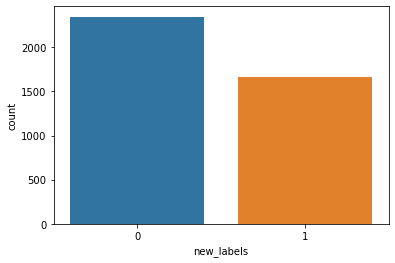

In [66]:
sns.countplot(df['new_labels'])

## Create dependent and independent variables

In [67]:
X=df.drop(['new_labels'], axis=1)
X

,post_text
0,start right foot first impression - square edg...
1,getting crop top + wide trousers combo right s...
2,sweet dreams made - bubble dream heel sandals ...
3,"@annavanticalopez: ""disney’s ceo, bob iger, bi..."
4,"@annavanticalopez: ""when first started modelli..."
...,...
4005,"flush blush pop pink, embrace season's colour ..."
4006,none
4007,none
4008,none


In [68]:
y=df['new_labels']
y

0       1
1       1
2       1
3       1
4       1
       ..
4005    1
4006    0
4007    0
4008    0
4009    0
Name: new_labels, Length: 4010, dtype: int64

## See y variable on countplot

<AxesSubplot:xlabel='new_labels', ylabel='count'>

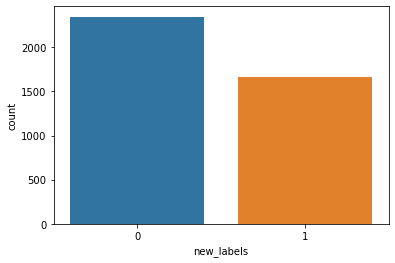

In [69]:
sns.countplot(y)

## Use NLP for text classification convert X['post_text'] to vectors using tfidf

In [70]:
cv=CountVectorizer(stop_words="english")

In [71]:
from nltk.tokenize import word_tokenize
X = X['post_text'].apply(lambda x: word_tokenize(x))

In [72]:
X.head()

0    [start, right, foot, first, impression, -, squ...
1    [getting, crop, top, +, wide, trousers, combo,...
2    [sweet, dreams, made, -, bubble, dream, heel, ...
3    [@, annavanticalopez, :, ``, disney, ’, s, ceo...
4    [@, annavanticalopez, :, ``, when, first, star...
Name: post_text, dtype: object

In [73]:
X = X.apply(lambda x: [word for word in x if word.isalpha()])
X

0       [start, right, foot, first, impression, square...
1       [getting, crop, top, wide, trousers, combo, ri...
2       [sweet, dreams, made, bubble, dream, heel, san...
3       [annavanticalopez, disney, s, ceo, bob, iger, ...
4       [annavanticalopez, when, first, started, model...
                              ...                        
4005    [flush, blush, pop, pink, embrace, season, col...
4006                                               [none]
4007                                               [none]
4008                                               [none]
4009                                               [none]
Name: post_text, Length: 4010, dtype: object

In [74]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASAD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [75]:
X = X.apply(lambda x: [WordNetLemmatizer().lemmatize(word) for word in x])
X

0       [start, right, foot, first, impression, square...
1       [getting, crop, top, wide, trouser, combo, rig...
2       [sweet, dream, made, bubble, dream, heel, sand...
3       [annavanticalopez, disney, s, ceo, bob, iger, ...
4       [annavanticalopez, when, first, started, model...
                              ...                        
4005    [flush, blush, pop, pink, embrace, season, col...
4006                                               [none]
4007                                               [none]
4008                                               [none]
4009                                               [none]
Name: post_text, Length: 4010, dtype: object

In [76]:
Tfidf_vect = TfidfVectorizer()
X = Tfidf_vect.fit_transform(X.astype(str))

In [77]:
Tfidf_vect

TfidfVectorizer()

In [78]:
print(X)

  (0, 1947)	0.2350099366370296
  (0, 1059)	0.19052057268493836
  (0, 376)	0.2718902131801578
  (0, 2107)	0.25540632757360954
  (0, 3936)	0.22518518578668686
  (0, 3266)	0.15297582515078356
  (0, 3117)	0.20241180039850096
  (0, 1679)	0.17429792753981763
  (0, 1125)	0.3386367171004082
  (0, 3450)	0.30574180307134474
  (0, 1796)	0.3281916909485885
  (0, 1396)	0.2660794887630974
  (0, 1438)	0.26087101059004353
  (0, 3054)	0.27506834503576677
  (0, 3468)	0.30574180307134474
  (1, 743)	0.35059060449084833
  (1, 3823)	0.35059060449084833
  (1, 4054)	0.2217729710835412
  (1, 3775)	0.22543027763212858
  (1, 888)	0.36793008658644677
  (1, 1525)	0.30864600572922285
  (1, 1947)	0.19978782527144467
  (1, 1059)	0.16196630419497118
  (1, 2107)	0.21712730736704317
  (1, 3936)	0.19143555883406688
  :	:
  (4004, 3712)	0.30900715042088833
  (4004, 1748)	0.11125294819878268
  (4004, 2561)	0.21357879275798886
  (4004, 4094)	0.2497191610248712
  (4004, 3557)	0.17571511377813376
  (4004, 3166)	0.196333101582

## Train model on 70% data

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2807, 4231) (2807,)
(1203, 4231) (1203,)


In [80]:
print(X_train)

  (0, 2453)	1.0
  (1, 3042)	0.4260230318690522
  (1, 817)	0.342387722582339
  (1, 1042)	0.16316227786676152
  (1, 2361)	0.16175037907908943
  (1, 1748)	0.117888733478802
  (1, 1439)	0.2777845008399355
  (1, 3807)	0.2694892342161558
  (1, 1191)	0.27122157927777746
  (1, 2483)	0.38199274150247325
  (1, 2039)	0.22343018065085984
  (1, 1332)	0.22204435080578191
  (1, 3722)	0.3498240351139461
  (1, 3117)	0.20909874563037126
  (2, 2453)	1.0
  (3, 2453)	1.0
  (4, 2453)	1.0
  (5, 2453)	1.0
  (6, 1919)	0.34213104459164656
  (6, 2231)	0.3324606473425553
  (6, 3897)	0.28743592931822554
  (6, 2807)	0.2301094200271402
  (6, 1999)	0.30129943796677805
  (6, 3478)	0.30129943796677805
  (6, 1748)	0.10932442986031603
  :	:
  (2801, 2131)	0.3157208818119816
  (2802, 2453)	1.0
  (2803, 2951)	0.403815373383496
  (2803, 1799)	0.36080893535265696
  (2803, 3404)	0.36080893535265696
  (2803, 2507)	0.3522516069183645
  (2803, 810)	0.3062160299763112
  (2803, 994)	0.19843762956944214
  (2803, 2433)	0.16817236505

## Train at least three classification algorithms

In [81]:
#Decision Tree Classifier.
dt_clf=DecisionTreeClassifier(random_state=25)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=25)

In [82]:
dt_pred = dt_clf.predict(X_test)

In [83]:
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))
Decision_Tree_Accuracy = round(accuracy_score(y_test, dt_pred)*100)
Decision_Tree_Accuracy

[[631  88]
 [105 379]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       719
           1       0.81      0.78      0.80       484

    accuracy                           0.84      1203
   macro avg       0.83      0.83      0.83      1203
weighted avg       0.84      0.84      0.84      1203



84

AUC: 0.8303328199174703


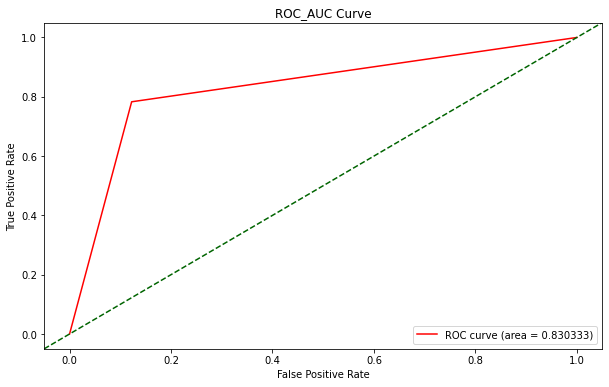

In [84]:
# Roc auc curve
fpr, tpr, thresholds = roc_curve(y_test, dt_pred)
auc = roc_auc_score(y_test, dt_pred)
print('AUC:', auc)

plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, color = 'red', label = 'ROC curve (area = %f)' % auc)
plt.plot([-0.05, 1.05], [-0.05, 1.05], linestyle = '--', color = 'darkgreen')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC Curve')
plt.legend(loc = "lower right")
plt.show()

In [85]:
#Logistic regression.
lr_model = LogisticRegression(random_state=25)

In [86]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=25)

In [87]:
lr_model.score(X_train, y_train)

0.9291058069112932

In [88]:
pred_1 = lr_model.predict(X_test)

In [89]:
print(confusion_matrix(y_test,pred_1))
print(classification_report(y_test,pred_1))
Logistic_regression_Accuracy = round(accuracy_score(y_test, pred_1)*100)
print(Logistic_regression_Accuracy)

[[558 161]
 [ 24 460]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86       719
           1       0.74      0.95      0.83       484

    accuracy                           0.85      1203
   macro avg       0.85      0.86      0.85      1203
weighted avg       0.87      0.85      0.85      1203

85


AUC: 0.863245554546604


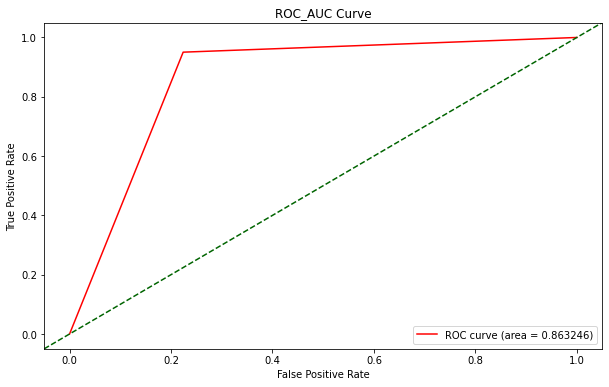

In [90]:
# Roc auc curve
fpr, tpr, thresholds = roc_curve(y_test, pred_1)
auc = roc_auc_score(y_test, pred_1)
print('AUC:', auc)

plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, color = 'red', label = 'ROC curve (area = %f)' % auc)
plt.plot([-0.05, 1.05], [-0.05, 1.05], linestyle = '--', color = 'darkgreen')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC Curve')
plt.legend(loc = "lower right")
plt.show()

In [91]:
#Multinomial Naive bayes algorithm. 
from sklearn.naive_bayes import MultinomialNB

In [92]:
clf = MultinomialNB()

In [93]:
clf.fit(X_train, y_train)

MultinomialNB()

In [94]:
pred_2 = clf.predict(X_test)

In [95]:
print(confusion_matrix(y_test,pred_2))
print(classification_report(y_test,pred_2))
Multinomial_naive_bayes = round(accuracy_score(y_test, pred_2)*100)
print(Multinomial_naive_bayes)

[[583 136]
 [ 41 443]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       719
           1       0.77      0.92      0.83       484

    accuracy                           0.85      1203
   macro avg       0.85      0.86      0.85      1203
weighted avg       0.87      0.85      0.85      1203

85


AUC: 0.8630688283773377


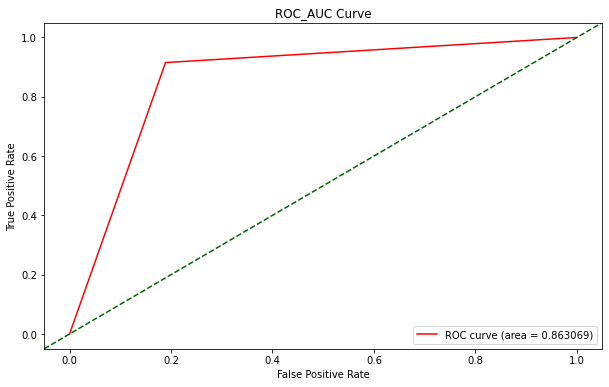

In [96]:
# Roc auc curve
fpr, tpr, thresholds = roc_curve(y_test, pred_2)
auc = roc_auc_score(y_test, pred_2)
print('AUC:', auc)

plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, color = 'red', label = 'ROC curve (area = %f)' % auc)
plt.plot([-0.05, 1.05], [-0.05, 1.05], linestyle = '--', color = 'darkgreen')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC Curve')
plt.legend(loc = "lower right")
plt.show()

## Create a dataframe from algorithm results

In [97]:
data = {'Models': ['Decision Tree Classifier', 'Logistic Regression',  'Multinomial Naive Bayes'], 'Accuracy of Models': [Decision_Tree_Accuracy, Logistic_regression_Accuracy, Multinomial_naive_bayes]}
data1 = pd.DataFrame(data)
display(data1)

,Models,Accuracy of Models
0,Decision Tree Classifier,84
1,Logistic Regression,85
2,Multinomial Naive Bayes,85


## Create a barplot from dataframe

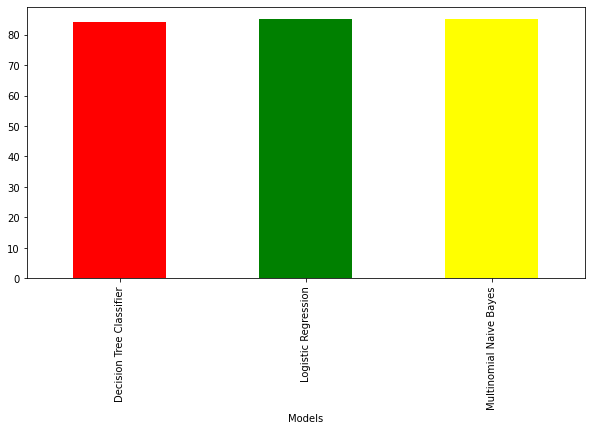

In [98]:
#Create barplot on the above dataframe.
data1.plot(x='Models', y='Accuracy of Models', kind='bar', color = ['red', 'green', 'yellow'], figsize = (10, 5),legend=None)
plt.show()